**This file is used for exploring the data**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import numpy as np

In [3]:

df = pd.read_csv("cleaned_data.csv", 
                 parse_dates=["date_transaction", "date", "time"])

# Convert the time column to string or time format
df["time"] = pd.to_datetime(df["time"], format="%H:%M:%S") 
df["year_month"] = df["date"].dt.to_period("M")

date_counts = df["year_month"].value_counts().sort_index()
df["weekday"] = df["date"].dt.day_name()

In [35]:
def visits_per_month(df):
    df = df[df["year_month"] != "2025-03"]
    date_counts = df["year_month"].value_counts().sort_index()
    plt.figure(figsize=(10,5))
    x_values = range(len(date_counts))
    y_values = date_counts.values

    sns.barplot(x=date_counts.index.astype(str), y=y_values, color="skyblue", edgecolor="black")

    # trendline
    sns.regplot(x=list(x_values), y=y_values, scatter=False, color="red", ci=None, line_kws={'linestyle': '--', 'alpha': 0.5})

    plt.xlabel("Monat")
    plt.ylabel("Burgerista Besuche")
    plt.title("Anzahl der Burgerista Besuche pro Monat")
    plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    # plt.savefig("Burgerista_Besuche.png")
    plt.show()


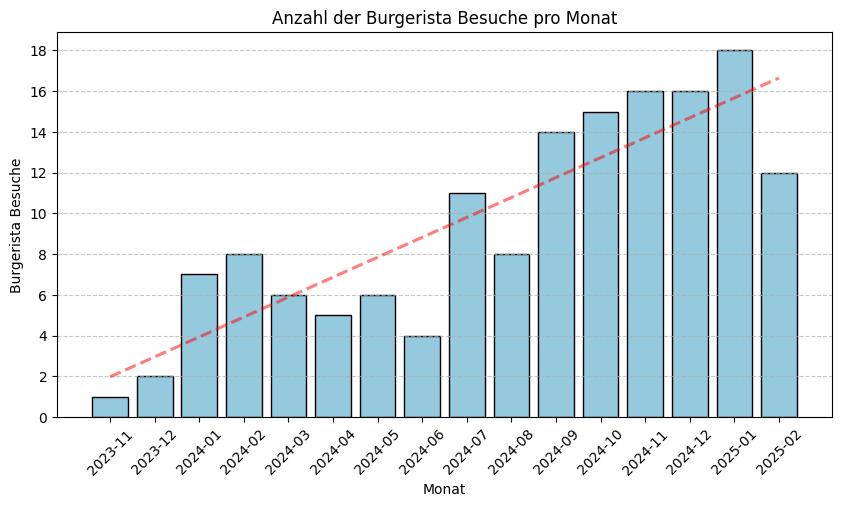

In [37]:
visits_per_month(df)

In [6]:
def calc_day_range(df):
    min_date = df["date"].min()
    max_date = df["date"].max()
    date_range = pd.date_range(start=min_date, end=max_date)
    date_count = len(date_range)
    return date_count


def mean_visit(df):
    visits = df.shape[0]
    date_count = calc_day_range(df)
    mean_visit_value = date_count / visits
    return mean_visit_value

In [51]:
total_burgers = df.shape[0] * 2
total_money_spent = df["price"].sum()
visits = df.shape[0]

mask_jan = df["year_month"] == "2025-01"
jan = df[mask_jan]

mean_visit_all = mean_visit(df)
mean_visit_jan = mean_visit(jan)
min_date = df["date"].min()
max_date = df["date"].max()
date_range = pd.date_range(start=min_date, end=max_date)
date_count = len(date_range)
total_money_saved = df.shape[0] * 6.4 - 30 * 0.5


print("Quick summary:")
print("-" * 20)
print(f"The following total metrics are base on the time span between {min_date.date()} and {max_date.date()}")
print(f"This is equivalent to ~ {date_count//30} months or {date_count} days")
print(f"Total Burgers eaten: {total_burgers}")
print(f"Total Money spent: {total_money_spent:.2f} €")
print(f"Total Money saved: {total_money_saved:.2f} €")
print(f"Money spent without deal {total_money_spent + total_money_saved} €")

print(f"Total Burgerista Visits: {visits}")
print(f"Estimated time spent: {visits * 30} min or {visits * 30/60} hrs")
print(f"Since Nov 2023 a Visit every {mean_visit_all:.2f} days or {1/(mean_visit_all/2):.2f} Burgers a day")
print(f"In January 2025 a Visit every {mean_visit_jan:.2f} days or {1/(mean_visit_jan/2):.2f} Burgers a day")

Quick summary:
--------------------
The following total metrics are base on the time span between 2023-11-21 and 2025-03-07
This is equivalent to ~ 15 months or 473 days
Total Burgers eaten: 306
Total Money spent: 1047.80 €
Total Money saved: 964.20 €
Money spent without deal 2012.0 €
Total Burgerista Visits: 153
Estimated time spent: 4590 min or 76.5 hrs
Since Nov 2023 a Visit every 3.09 days or 0.65 Burgers a day
In January 2025 a Visit every 1.72 days or 1.16 Burgers a day


In [8]:
def plot_weekdays(df):
    plt.figure(figsize=(10,5))
    weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    df["weekday"] = pd.Categorical(df["weekday"], categories=weekday_order, ordered=True)
    wochentage = ["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"]
    # Count occurrences per weekday, ensuring the correct order
    weekday_counts = df["weekday"].value_counts().reindex(weekday_order, fill_value=0)
    plt.bar(wochentage, weekday_counts.values, color="skyblue", edgecolor="black")

    # Set the y-axis to percentage format
    plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=len(df)))
    
    plt.xlabel("Pronzentueller Anteil der Besuche pro Wochentag")
    plt.ylabel("% der Besuche")
    plt.title("Wochentage")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    # plt.savefig("Wochentage_analyse.png")
    plt.show()

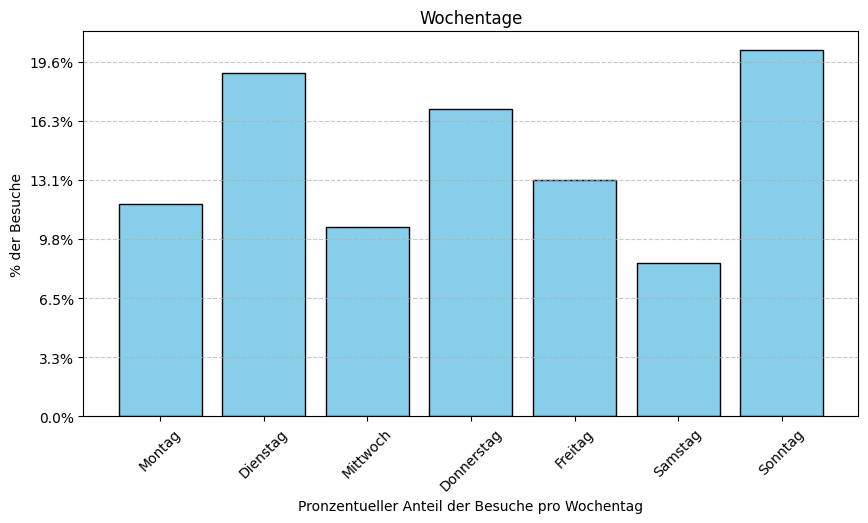

In [9]:
plot_weekdays(df)

In [10]:
def plot_time_distribution(df):
    df["hour"] = df["time"].dt.hour
    hour_counts = df["hour"].value_counts().sort_index()
    # hour_percentages = (hour_counts /  df.shape[0])
    
    plt.figure(figsize=(10, 5))
    plt.bar(hour_counts.index, hour_counts.values, color="skyblue", edgecolor="black")
    plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=len(df)))
    plt.xlabel("Uhrzeit")
    plt.ylabel("% der Besuche")
    plt.title("Prozentueller Anteil der Besuche pro Stunde")
    plt.xticks(range(11, 22))
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    # plt.savefig("Uhrzeit_analyse.png")
    plt.show()

def plot_time_by_weekday(df):
    df["hour"] = df["time"].dt.hour
    weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    df["weekday"] = pd.Categorical(df["weekday"], categories=weekday_order, ordered=True)

    # Create pivot table (counts per weekday & hour)
    heatmap_data = df.groupby(["weekday", "hour"]).size().unstack(fill_value=0)
    heatmap_data = heatmap_data / df.shape[0] * 100

    # Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".1f", linewidths=0.5)
    plt.xlabel("Uhrzeit")
    plt.ylabel("Wochentag")
    plt.title("Prozentueller Anteil der Besuche pro Wochentag und Uhrzeit")
    # plt.savefig("Besuche_heatmap.png")
    plt.show()


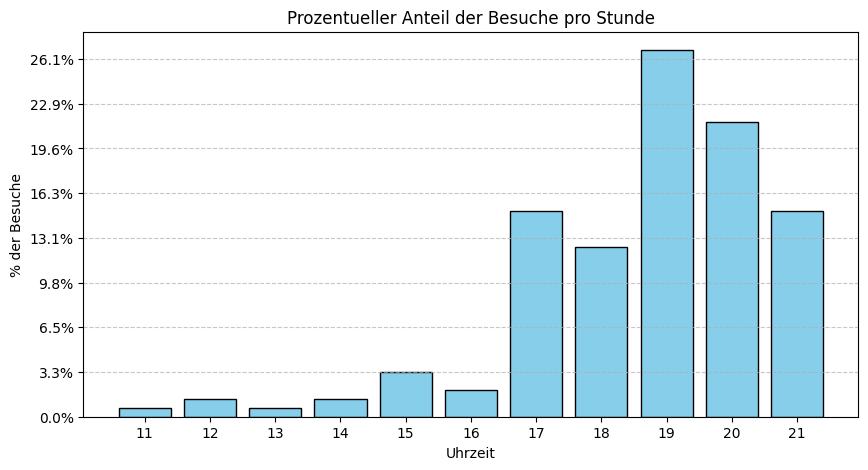

C:\Users\simon\AppData\Local\Temp\ipykernel_11148\4068747753.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(["weekday", "hour"]).size().unstack(fill_value=0)


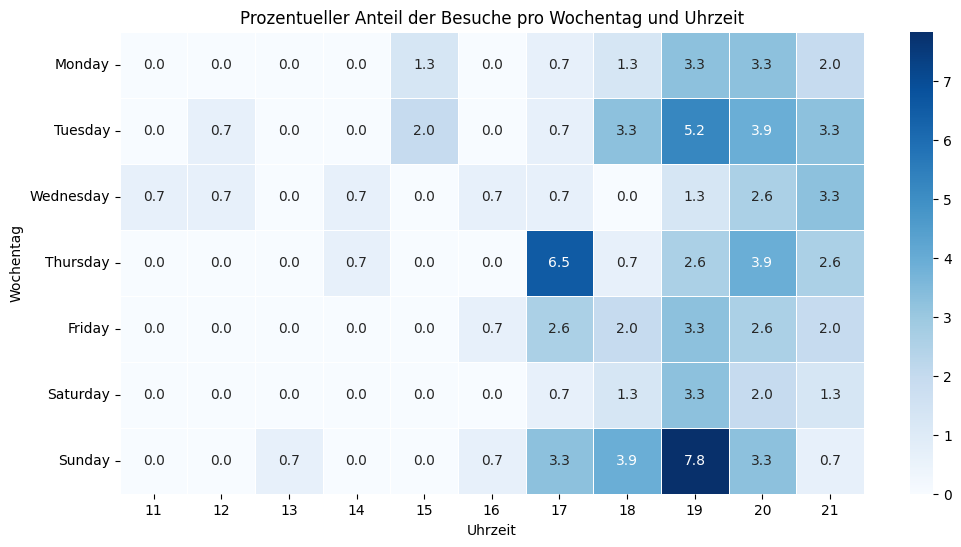

In [11]:
plot_time_distribution(df)
plot_time_by_weekday(df)

In [12]:
# defining nutrional need
kcal = 3000
fats = 90
carbs = 420
protein = 70
nutritional_need = np.array([kcal, fats, carbs, protein])

# nutrional data for a Burgerista cheeseburger
b_kcal = 561
b_fats = 30
b_carbs = 50
b_protein = 22
burger_nutrition = np.array([b_kcal, b_fats, b_carbs, b_protein])

# calculating
def calculate_nutrition(df, title, save):
    day_count = calc_day_range(df)
    total_nutrition = nutritional_need * day_count
    total_burger_nutrition = burger_nutrition * df.shape[0] * 2
    nutrition_percentage = np.divide(total_burger_nutrition, total_nutrition) * 100

    plt.figure(figsize=(10,5))
    sns.barplot(x=["Energie (kcal)", "Fett (g)", "Kohlenhydrate (g)", "Eiweiß (g)"], y=nutrition_percentage, color="skyblue", edgecolor="black" )
    plt.ylim(0, 50)
    plt.ylabel("% des Bedarfs")
    plt.xlabel("Nährwerte")
    plt.title(title)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    # plt.savefig(save)
    plt.show()

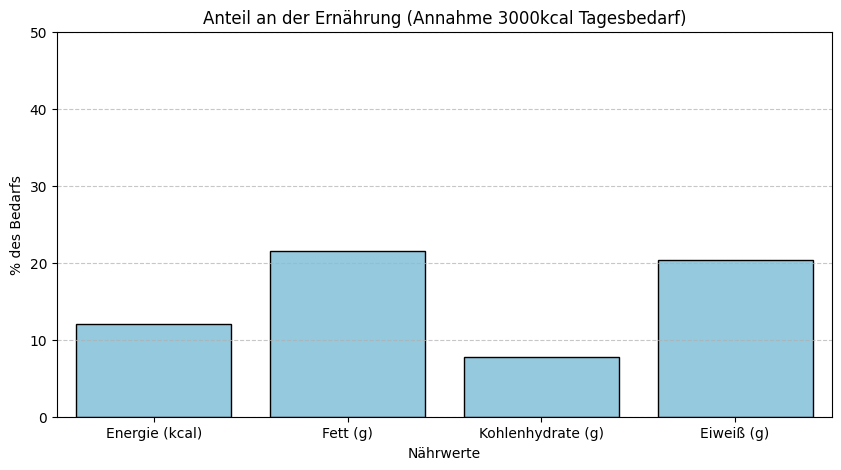

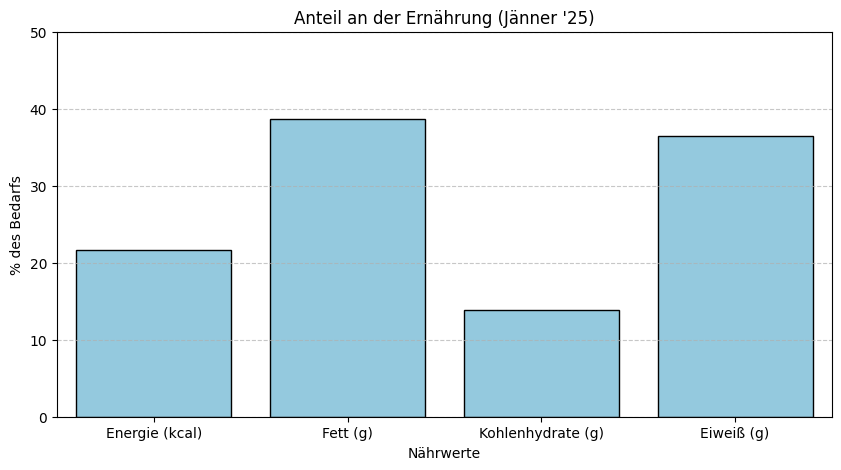

Calories total: 171666 kcal
Protein total: 6732 protein
Protein total: 9180 fats
Protein total: 15300 carbs


In [45]:
calculate_nutrition(df, "Anteil an der Ernährung (Annahme 3000kcal Tagesbedarf)", "Ernährungsanteil.png")
calculate_nutrition(jan, "Anteil an der Ernährung (Jänner '25)", "Ernährungsanteil-Jan.png")

print(f"Calories total: {b_kcal * df.shape[0] * 2} kcal")
print(f"Protein total: {b_protein *df.shape[0] * 2} protein")
print(f"Protein total: {b_fats *df.shape[0] * 2} fats")
print(f"Protein total: {b_carbs *df.shape[0] * 2} carbs")